In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [23]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

In [24]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [25]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [26]:
df.rename(columns = {'TotalFloor' : 'Total_Floor'})

,Sqft,Floor,Total_Floor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [29]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,4.406467e-17,-4.406467e-17,-4.406467e-17,-1.432102e-16,2.451097e-16,3.304850e-17,-1.046536e-16
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


In [30]:
# Optimum number of clusters using elbow method -

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [31]:
kmeans.inertia_

2154.2666147647597

In [32]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)

    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data.shape[0]
    mapping2[k] = kmeanModel.inertia_   

1 : 2.3615265828331347
2 : 1.9847844864092707
3 : 1.7689753319894392
4 : 1.6554612074943404
5 : 1.5246647678752632
6 : 1.4588606751629214
7 : 1.4264017634855806
8 : 1.3532921046172894
9 : 1.30915425417311
10 : 1.2878071973030123
11 : 1.2530175102277088
12 : 1.231844188099684
13 : 1.19122851513534
14 : 1.1898073451291689


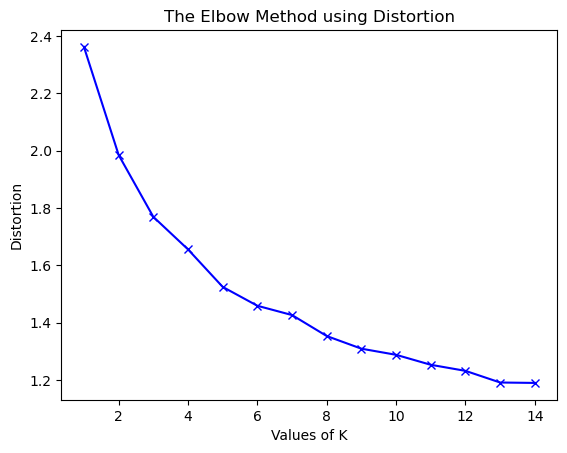

In [16]:
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 4515.0
2 : 3205.723708410711
3 : 2502.441531309816
4 : 2154.143162154438
5 : 1881.4307670238518
6 : 1726.909097242231
7 : 1618.6736164539277
8 : 1494.6981424380913
9 : 1403.3191336438433
10 : 1375.4069724824974
11 : 1272.1576308501515
12 : 1231.9971953451131
13 : 1193.0118550380569
14 : 1134.5802416265383


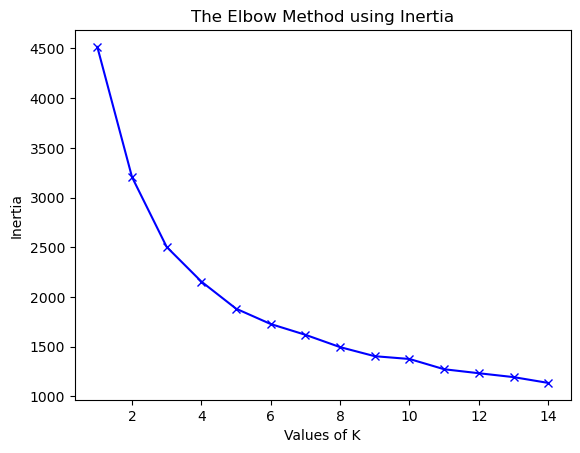

In [17]:
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [33]:
kmeans = KMeans( n_clusters = 6, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [19]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    202
1    132
2    115
4     88
3     80
5     28
Name: cluster, dtype: int64

In [34]:
kmeans = KMeans( n_clusters = 8, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [21]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    216
4    110
1     88
2     74
5     67
7     41
0     30
6     19
Name: cluster, dtype: int64